In [1]:
import numpy as np
from atu3.brt.brt_air_6d import *
import odp
from odp.Plots import plot_isosurface
from odp.Plots import PlotOptions
import matplotlib.pyplot as plt

In [2]:
from odp.Shapes.ShapesFunctions import *
from odp.Plots.plot_options import *
from odp.solver import HJSolver

X1, X2, X3, X4, X5, X6 = np.meshgrid(*grid.grid_points, indexing='ij')

def collide(X1, X2, X4, X5):
    return np.sqrt((X1 - X4)**2 + (X2 - X5)**2) - cylinder_r

def wall(X4, X5):
    def lower_half_space(x, value):
        return x - value
    
    def upper_half_space(x, value):
        return -x + value

    return np.minimum(
        np.minimum(lower_half_space(X4, -2.0 + car_r), upper_half_space(X4, 2.0 - car_r)),
        np.minimum(lower_half_space(X5, -2.0 + car_r), upper_half_space(X5, 2.0 - car_r))
    )

# ivf = np.minimum(collide(X1, X2, X4, X5), wall(X4, X5))
ivf = collide(X1, X2, X4, X5)

In [2]:
brt = np.load("./envs/assets/brts/air6d_brt_no_wall_5_40_v1.npy")

In [3]:
brt.shape

(35, 35, 16, 35, 35, 16)

In [4]:
# plot in the view point of th persuer, slicecut represents state of evader
po = PlotOptions(do_plot=True, plot_type="3d_plot", plotDims=[0, 1, 2], slicesCut=[15, 15, 10]) 

[0, 1, 2]
[0, 1, 2]


In [5]:
# plot_isosurface(grid, brt, po)

In [4]:
xp = [-1, 1, 1, -1]
yp = [-1, 0, -1, 1]
thetap = [np.pi/4, -np.pi, np.pi * 3/4, -np.pi/4]
xe = [0, 0, 0, 0]
ye = [0, 0, 0, 0]
thetae = [0, 0, -np.pi/4, np.pi * 3/4]

Text(0.5, 1.0, 'xp=-1, yp=-1, tp=0.79, te=0.00')

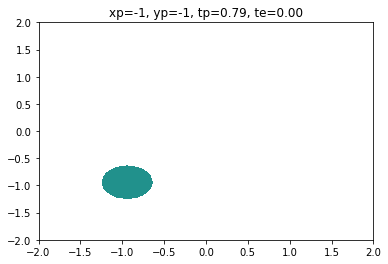

In [5]:
Xe, Ye = np.meshgrid(
    np.linspace(grid.min[3], grid.max[3], grid.pts_each_dim[3]),
    np.linspace(grid.min[4], grid.max[4], grid.pts_each_dim[4]), indexing='ij')

index = grid.get_index((xp[0], yp[0], thetap[0], xe[0], yp[0], thetae[0]))
# brt_slice = brt[index[0], index[1], index[2], :, :, index[5]]
brt_slice = ivf[index[0], index[1], index[2], :, :, index[5]]
plt.contourf(Xe, Ye, brt_slice, levels=[-100000, 0.1])
plt.title(f"xp={xp[0]}, yp={yp[0]}, tp={thetap[0]:.2f}, te={thetae[0]:.2f}")

Text(0.5, 1.0, 'xp=1, yp=0, tp=-3.14, te=0.00')

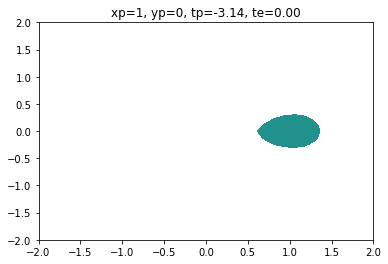

In [8]:
index = grid.get_index((xp[1], yp[1], thetap[1], xe[1], yp[1], thetae[1]))
brt_slice = brt[index[0], index[1], index[2], :, :, index[5]]
plt.contourf(Xe, Ye, brt_slice, levels=[-100000, 0.1])
plt.title(f"xp={xp[1]}, yp={yp[1]}, tp={thetap[1]:.2f}, te={thetae[1]:.2f}")

<Figure size 720x2880 with 0 Axes>

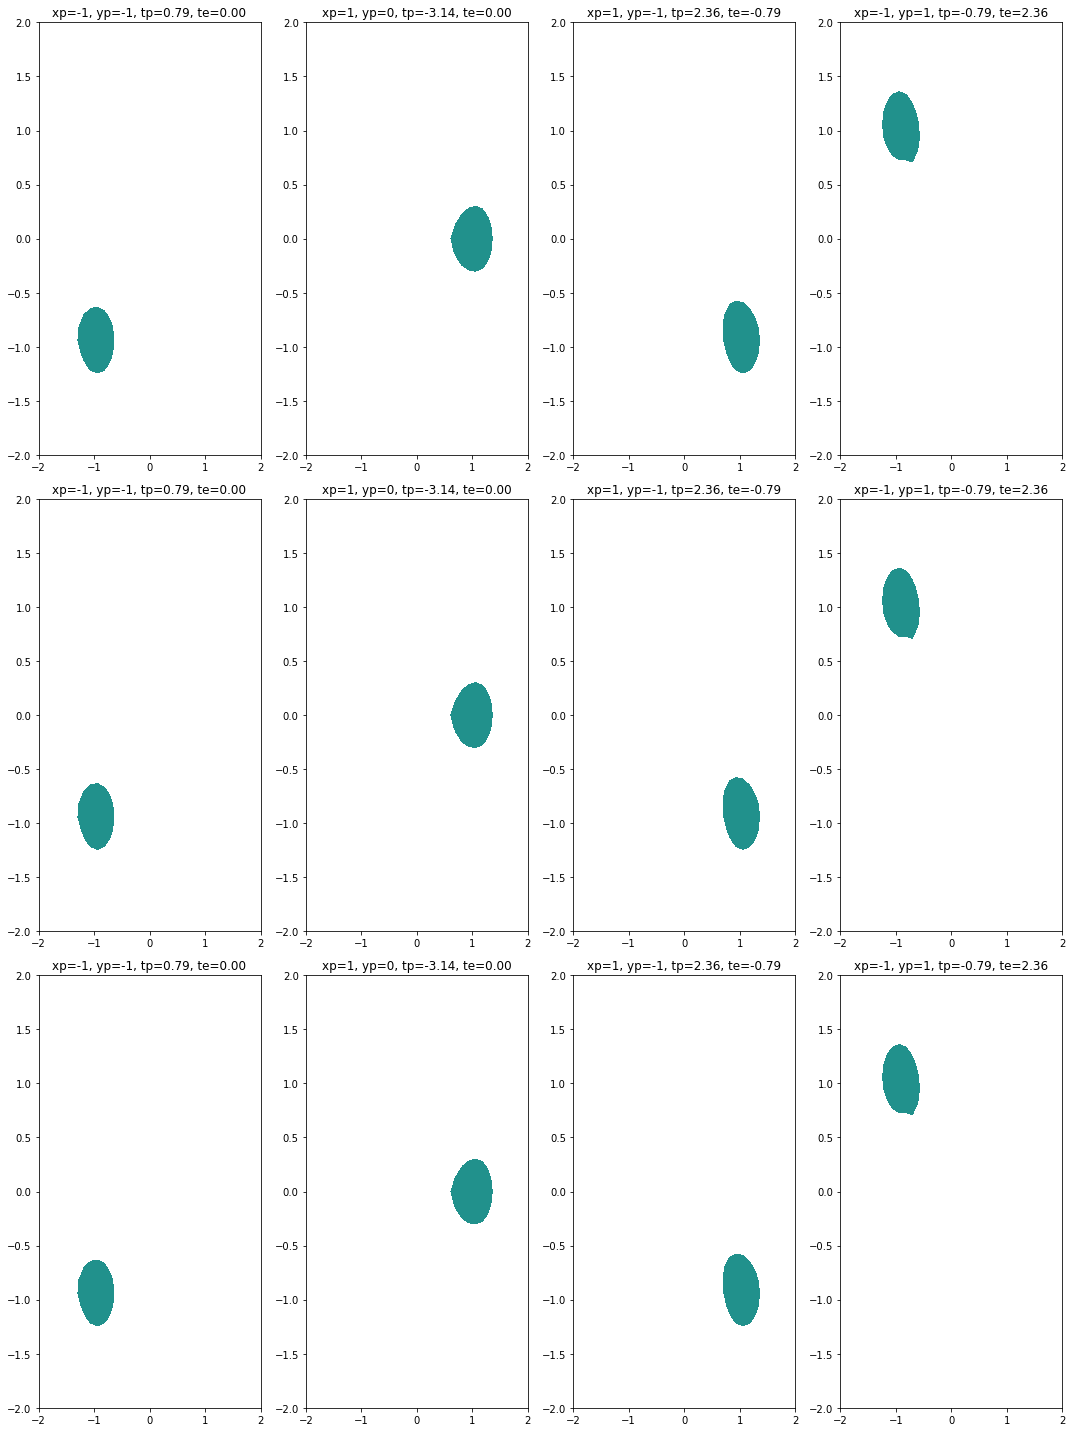

In [35]:
fig = plt.figure(figsize=(15, 20))
for i in range(3):
    for j in range(len(xe)):
        ax = fig.add_subplot(3, len(xe), (j+1) + i * len(xe))
        ax.set_title(f"xp={xp[j]}, yp={yp[j]}, tp={thetap[j]:.2f}, te={thetae[j]:.2f}")
        index = grid.get_index((xp[j], yp[j], thetap[j], xe[j], yp[j], thetae[j]))
        brt_slice = brt[index[0], index[1], index[2], :, :, index[5]]
        ax.contourf(Xe, Ye, brt_slice, levels=[-100000, 0.1]) 
fig.savefig('test')

In [1]:
import torch
def f(x):
    return x[..., 0]**2 + x[..., 1]**2

x = torch.tensor([[1.0, 2.0], [2.0, 4.0]], requires_grad=True)
fx = f(x)
# torh.autograd.grad computes a vjp or vector-jacobian product
# 
# grad_outputs is the “vector” in the vector-Jacobian product
# create_graph=True  since we are going to use the gradient of the NN
torch.autograd.grad(fx, x, grad_outputs=torch.ones_like(fx), create_graph=True)[0]

tensor([[2., 4.],
        [4., 8.]], grad_fn=<AddBackward0>)